<a href="https://colab.research.google.com/github/78526Nasir/Getting-Started-with-Tensorflow/blob/master/Source%20Codes/GST_fasion_mnist_%5BClassification%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import numpy as np
import pandas
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


## Import the Fashion MNIST dataset

Fashion MNIST dataset contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

![fashion_mnist](https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/doc/img/fashion-mnist-sprite.png)



In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images[0][5]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
         0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
        10,   0], dtype=uint8)

In [5]:
"""
Label	Class
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot
"""

'\nLabel\tClass\n0\tT-shirt/top\n1\tTrouser\n2\tPullover\n3\tDress\n4\tCoat\n5\tSandal\n6\tShirt\n7\tSneaker\n8\tBag\n9\tAnkle boot\n'

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
sns.set(style="white")

def display_image(img):
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap = "gray_r")
  plt.colorbar()
  plt.show()

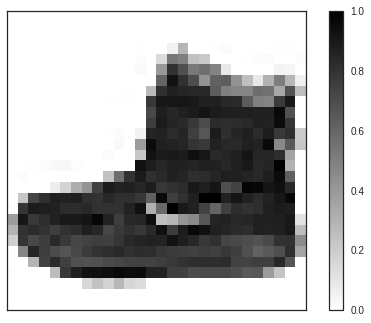

In [30]:
display_image(train_images[0])

In [0]:
# scale these values to a range of 0 to 1 before feeding to the neural network model. 

train_images = train_images / 255.0
test_images = test_images / 255.0

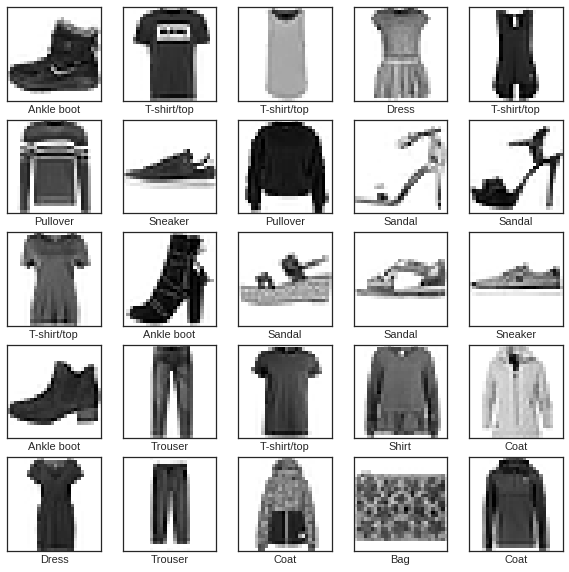

In [10]:
# Display the first 25 images from the training set and display the class name below each image. 
# Verify that the data is in the correct format and we're ready to build and train the network.

plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    
plt.show()

### Model Building

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(train_images, train_labels, epochs=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
60000/60000 [==============================] - 7s 115us/step - loss: 0.4993 - acc: 0.8245
Epoch 2/50
60000/60000 [==============================] - 7s 110us/step - loss: 0.3776 - acc: 0.8638
Epoch 3/50
60000/60000 [==============================] - 7s 119us/step - loss: 0.3402 - acc: 0.8765
Epoch 4/50
60000/60000 [==============================] - 7s 111us/step - loss: 0.3125 - acc: 0.8854
Epoch 5/50
60000/60000 [==============================] - 7s 112us/step - loss: 0.2953 - acc: 0.8912
Epoch 6/50
60000/60000 [==============================] - 7s 114us/step - loss: 0.2798 - acc: 0.8956
Epoch 7/50
60000/60000 [==============================] - 7s 110us/step - loss: 0.2686 - acc: 0.8999
Epoch 8/50
60000/60000 [==============================] - 6s 108us/step - loss: 0.2571 - acc: 0.9040
Epoch 9/50
60000/60000 [==============================] - 7s 109us/step - loss: 0.2455 - acc: 0.9085
Epoch 10/50
60000/60000 [==================

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 34us/step
Test accuracy: 0.8865


In [0]:
pred = model.predict(test_images)

In [16]:
pred[0]

array([1.65157184e-15, 2.39527517e-19, 4.53431089e-21, 1.73037395e-26,
       1.22856164e-23, 1.41357127e-13, 5.27864920e-20, 7.08641153e-07,
       1.95829107e-16, 9.99999285e-01], dtype=float32)

In [0]:
results = pred.argmax(axis=1)

In [18]:
results

array([9, 2, 1, ..., 8, 1, 5])

In [0]:
# We can graph to look at the full set of 10 channels:

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [0]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

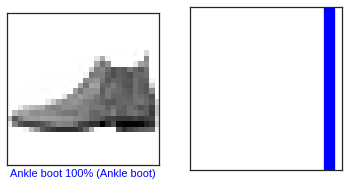

In [21]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred,  test_labels)
plt.show()

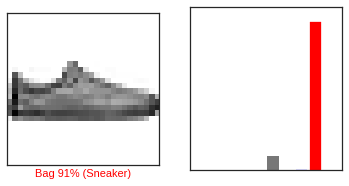

In [22]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred,  test_labels)
plt.show()

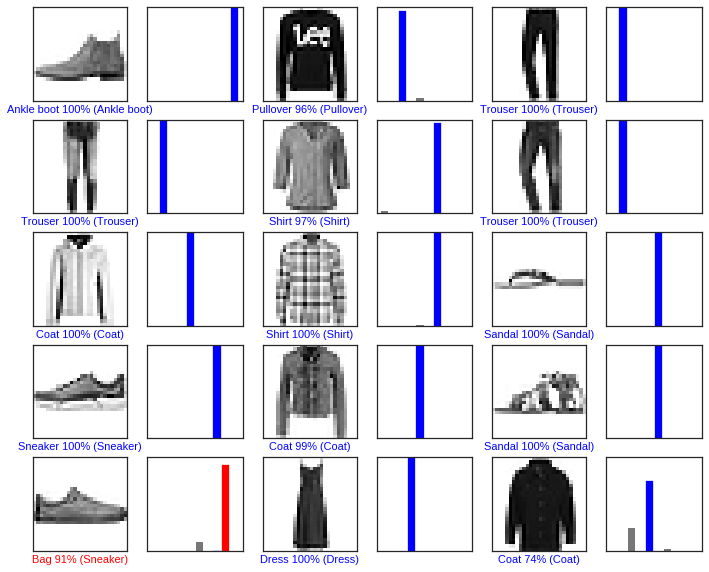

In [23]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, pred, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, pred, test_labels)

plt.show()

In [24]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [25]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [26]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.6515655e-15 2.3952752e-19 4.5343109e-21 1.7303541e-26 1.2285569e-23
  1.4135713e-13 5.2786492e-20 7.0864047e-07 1.9582909e-16 9.9999928e-01]]


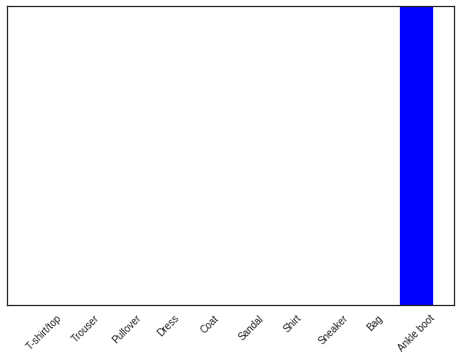

In [27]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [28]:
np.argmax(predictions_single[0])

9